# Exercise: 311 Requests

#### Summary

In NYC, you can call 311 with *anything* about the city - questions, complaints, etc. We'll be analyzing requests from 2015-2016 from the Department of Transportation and NYPD.

#### Data Source(s)

Filtered from full set, https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9

#### Files

- `data/311_Service_Requests_from_2010_to_Present.csv`, about 1.8 million rows (over 1GB of data)

#### Data dictionary

Visit [this page](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9#schema-preview) and click 'Show more' on the bottom right of the list (53 columns).

#### Skills

- Opening large files
- Time

## Opening the file

It's a big one! If your computer is slow or you only have 2GB of RAM, you might want to specify `nrows=50000` (or less). Increase the number until it takes around 20 seconds, maybe!

In [1]:
%%time
%matplotlib inline
import pandas as pd
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv")

<string>:2: DtypeWarning: Columns (17,47) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 29.8 s, sys: 6.44 s, total: 36.3 s
Wall time: 37 s


In [2]:
df.head()

Unique Key            Created Date             Closed Date Agency  \
0    31463990  09/04/2015 10:55:25 PM  09/05/2015 02:06:54 AM   NYPD   
1    31463991  09/04/2015 01:53:45 PM  09/04/2015 06:37:24 PM   NYPD   
2    31463992  09/04/2015 09:15:43 PM  09/04/2015 10:32:01 PM   NYPD   
3    31463993  09/05/2015 01:06:57 AM  09/05/2015 02:26:43 AM   NYPD   
4    31463995  09/04/2015 07:48:25 AM  09/04/2015 05:21:18 PM   NYPD   

                       Agency Name           Complaint Type  \
0  New York City Police Department  Noise - Street/Sidewalk   
1  New York City Police Department  Noise - Street/Sidewalk   
2  New York City Police Department  Noise - Street/Sidewalk   
3  New York City Police Department       Noise - Commercial   
4  New York City Police Department          Illegal Parking   

                     Descriptor        Location Type  Incident Zip  \
0              Loud Music/Party      Street/Sidewalk       10460.0   
1              Loud Music/Party      Street/Sidewalk       10031.0   
2              Loud Music/Party      Street/Sidewalk       10031.0   
3              Loud Music/Party  Club/Bar/Restaurant       11203.0   
4  Overnight Commercial Storage      Street/Sidewalk       11210.0   

      Incident Address                    ...                     \
0    1110 WYATT STREET                    ...                      
1                  NaN                    ...                      
2  545 WEST 144 STREET                    ...                      
3         UTICA AVENUE                    ...                      
4        GLENWOOD ROAD                    ...                      

  Bridge Highway Name Bridge Highway Direction Road Ramp  \
0                 NaN                      NaN       NaN   
1                 NaN                      NaN       NaN   
2                 NaN                      NaN       NaN   
3                 NaN                      NaN       NaN   
4                 NaN                      NaN       NaN   

  Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  \
0                    NaN             NaN             NaN                 NaN   
1                    NaN             NaN             NaN                 NaN   
2                    NaN             NaN             NaN                 NaN   
3                    NaN             NaN             NaN                 NaN   
4                    NaN             NaN             NaN                 NaN   

    Latitude  Longitude                                  Location  
0  40.839306 -73.877301    (40.83930620730105, -73.8773009180668)  
1  40.830222 -73.947684  (40.830222460372724, -73.94768359377827)  
2  40.825104 -73.949368  (40.825104318551325, -73.94936777115372)  
3  40.640965 -73.929232   (40.64096464471428, -73.92923194083798)  
4  40.634384 -73.941525    (40.63438406330588, -73.9415248319131)  

[5 rows x 53 columns]

### Measuring time in Jupyter Notebooks

How long did that take? Read it in again, but this time **time how long it takes.** (and no, not with your watch - with Jupyter!)

In [3]:
# 47.4 s

# how to display all columns
# pd.set_option('display.max_columns', 100)
# pd.options.display.max_options

### Look at the first few rows

Make sure you can see **every single column.**

### Speeding things up

We're going to be looking at open and close times, agencies, and the complaints (both types and descriptor). The only kind of location-based thing we'll want is borough.

**How much faster is it if we only read in those columns?**

In [4]:
%%time
df = pd.read_csv("data/311_Service_Requests_from_2010_to_Present.csv", usecols=["Agency", "Complaint Type", "Descriptor", "Closed Date", "Created Date"])


CPU times: user 10.8 s, sys: 877 ms, total: 11.6 s
Wall time: 11.8 s


In [5]:
df.head(30)

Created Date             Closed Date Agency  \
0   09/04/2015 10:55:25 PM  09/05/2015 02:06:54 AM   NYPD   
1   09/04/2015 01:53:45 PM  09/04/2015 06:37:24 PM   NYPD   
2   09/04/2015 09:15:43 PM  09/04/2015 10:32:01 PM   NYPD   
3   09/05/2015 01:06:57 AM  09/05/2015 02:26:43 AM   NYPD   
4   09/04/2015 07:48:25 AM  09/04/2015 05:21:18 PM   NYPD   
5   09/04/2015 11:31:12 AM  09/04/2015 03:01:54 PM   NYPD   
6   09/04/2015 07:02:24 AM  09/04/2015 01:55:53 PM   NYPD   
7   09/04/2015 12:34:05 PM  09/04/2015 01:38:47 PM   NYPD   
8   09/04/2015 07:56:42 PM  09/04/2015 09:18:31 PM   NYPD   
9   09/04/2015 09:04:42 PM  09/05/2015 12:39:53 AM   NYPD   
10  09/04/2015 08:26:09 PM  09/05/2015 01:09:44 AM   NYPD   
11  09/04/2015 11:07:15 AM  09/04/2015 11:16:33 AM   NYPD   
12  09/04/2015 10:23:59 PM  09/04/2015 10:49:19 PM   NYPD   
13  09/04/2015 11:16:12 PM  09/05/2015 02:49:33 AM   NYPD   
14  09/04/2015 04:49:55 PM  09/04/2015 09:20:38 PM   NYPD   
15  09/04/2015 02:39:46 PM  09/04/2015 02:52:11 PM   NYPD   
16  09/04/2015 08:21:22 PM  09/04/2015 11:41:18 PM   NYPD   
17  09/04/2015 11:34:23 PM  09/05/2015 12:29:52 AM   NYPD   
18  09/04/2015 09:55:19 PM  09/04/2015 11:26:51 PM   NYPD   
19  09/04/2015 11:44:07 PM  09/05/2015 12:07:18 AM   NYPD   
20  09/04/2015 08:12:10 AM  09/04/2015 03:34:40 PM   NYPD   
21  09/04/2015 11:14:40 PM  09/05/2015 02:58:23 AM   NYPD   
22  09/04/2015 08:17:20 PM  09/05/2015 01:48:21 AM   NYPD   
23  09/04/2015 10:54:59 PM  09/04/2015 11:32:15 PM   NYPD   
24  09/04/2015 03:45:14 PM  09/04/2015 04:50:16 PM   NYPD   
25  09/04/2015 11:48:20 PM  09/05/2015 03:12:44 AM   NYPD   
26  09/05/2015 01:53:40 AM  09/05/2015 02:50:37 AM   NYPD   
27  09/04/2015 11:34:47 PM  09/05/2015 01:45:56 AM   NYPD   
28  09/04/2015 11:37:52 PM  09/05/2015 01:03:04 AM   NYPD   
29  09/04/2015 11:01:37 PM  09/05/2015 02:06:56 AM   NYPD   

              Complaint Type                     Descriptor  
0    Noise - Street/Sidewalk               Loud Music/Party  
1    Noise - Street/Sidewalk               Loud Music/Party  
2    Noise - Street/Sidewalk               Loud Music/Party  
3         Noise - Commercial               Loud Music/Party  
4            Illegal Parking   Overnight Commercial Storage  
5            Illegal Parking   Overnight Commercial Storage  
6            Illegal Parking  Posted Parking Sign Violation  
7            Illegal Parking  Posted Parking Sign Violation  
8            Illegal Parking  Posted Parking Sign Violation  
9    Noise - Street/Sidewalk               Loud Music/Party  
10   Noise - Street/Sidewalk               Loud Music/Party  
11   Noise - Street/Sidewalk               Loud Music/Party  
12   Noise - Street/Sidewalk               Loud Music/Party  
13   Noise - Street/Sidewalk               Loud Music/Party  
14        Noise - Commercial                   Loud Talking  
15           Illegal Parking  Posted Parking Sign Violation  
16                   Traffic            Congestion/Gridlock  
17   Noise - Street/Sidewalk               Loud Music/Party  
18   Noise - Street/Sidewalk               Loud Music/Party  
19   Noise - Street/Sidewalk               Loud Music/Party  
20   Noise - Street/Sidewalk               Loud Music/Party  
21              Noise - Park               Loud Music/Party  
22   Noise - Street/Sidewalk                   Loud Talking  
23   Noise - Street/Sidewalk                   Loud Talking  
24  Noise - House of Worship               Banging/Pounding  
25   Noise - Street/Sidewalk               Loud Music/Party  
26       Noise - Residential               Loud Music/Party  
27       Noise - Residential               Loud Music/Party  
28       Noise - Residential               Loud Music/Party  
29           Noise - Vehicle                Car/Truck Music

## Converting the 'Created Date' and 'Closed Date' columns to datetimes

### First, testing some things out

Let's take a look at converting **Created Date**, but **not all at once**.

1. Take 10,000 of them and try to convert them **without** a format string. Time it.
2. Take the same 10,000 and try to convert them **with** a format string. Time it.

If you tried to do all 1.8 million rows, **how long might it take with a format string vs without?**

In [6]:
df.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Complaint Type',
       'Descriptor'],
      dtype='object')

In [7]:
%%time
#pd.to_datetime(df['Created Date'].head(500000))

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.96 µs


In [8]:
%%time
pd.to_datetime(df['Created Date'], format='%m/%d/%Y %X %p')

# 09/04/2015 10:55:25 PM

CPU times: user 8.48 s, sys: 66.5 ms, total: 8.55 s
Wall time: 8.62 s


0         2015-09-04 10:55:25
1         2015-09-04 01:53:45
2         2015-09-04 09:15:43
3         2015-09-05 01:06:57
4         2015-09-04 07:48:25
5         2015-09-04 11:31:12
6         2015-09-04 07:02:24
7         2015-09-04 12:34:05
8         2015-09-04 07:56:42
9         2015-09-04 09:04:42
10        2015-09-04 08:26:09
11        2015-09-04 11:07:15
12        2015-09-04 10:23:59
13        2015-09-04 11:16:12
14        2015-09-04 04:49:55
15        2015-09-04 02:39:46
16        2015-09-04 08:21:22
17        2015-09-04 11:34:23
18        2015-09-04 09:55:19
19        2015-09-04 11:44:07
20        2015-09-04 08:12:10
21        2015-09-04 11:14:40
22        2015-09-04 08:17:20
23        2015-09-04 10:54:59
24        2015-09-04 03:45:14
25        2015-09-04 11:48:20
26        2015-09-05 01:53:40
27        2015-09-04 11:34:47
28        2015-09-04 11:37:52
29        2015-09-04 11:01:37
                  ...        
1844248   2016-08-13 12:43:04
1844249   2016-08-26 02:04:00
1844250   

### Creating new columns

Create new columns called `created_at` and `closed_at` from the `Created Date` and `Closed Date` columns. Do them individually, and **time them**.

In [9]:
%%time
df['created_at'] = pd.to_datetime(df['Created Date'], format='%m/%d/%Y %X %p')

CPU times: user 8.98 s, sys: 144 ms, total: 9.12 s
Wall time: 9.53 s


In [10]:
%%time
df['closed_at'] = pd.to_datetime(df['Closed Date'], format='%m/%d/%Y %X %p')

CPU times: user 8.89 s, sys: 135 ms, total: 9.02 s
Wall time: 9.26 s


### Confirming they look okay

Take a look at the first few rows to make sure the dates look correct, and then make sure their data type is `datetime64[ns]`.

In [11]:
df['created_at'].head()

0   2015-09-04 10:55:25
1   2015-09-04 01:53:45
2   2015-09-04 09:15:43
3   2015-09-05 01:06:57
4   2015-09-04 07:48:25
Name: created_at, dtype: datetime64[ns]

In [12]:
df['closed_at'].head()

0   2015-09-05 02:06:54
1   2015-09-04 06:37:24
2   2015-09-04 10:32:01
3   2015-09-05 02:26:43
4   2015-09-04 05:21:18
Name: closed_at, dtype: datetime64[ns]

# Examining agencies

Who has more 311 requests, the Department of Transportation or the NYPD?

In [13]:
df['Agency'].value_counts()

NYPD    1251121
DOT      593157
Name: Agency, dtype: int64

## What's the difference between "Complaint Type" and "Descriptor" columns?

In [14]:
# Descriptor is associated to the Complaint Type, and provides further detail on the incident or condition. 
# Descriptor values are dependent on the Complaint Type, and are not always required in SR.

## What are the most popular categories of complaints for the NYPD? For the DOT?

In [15]:
df.groupby('Agency')['Complaint Type'].value_counts()

Agency  Complaint Type             
DOT     Street Condition               215052
        Street Light Condition         187228
        Traffic Signal Condition        79737
        Broken Muni Meter               47234
        Street Sign - Damaged           12041
        Sidewalk Condition              11630
        Highway Condition               10795
        Street Sign - Missing            9061
        DOT Literature Request           6028
        Curb Condition                   4381
        Street Sign - Dangling           4015
        Broken Parking Meter             1778
        Ferry Inquiry                    1067
        Bridge Condition                  835
        Ferry Complaint                   531
        Bus Stop Shelter Placement        395
        Agency Issues                     391
        Bike Rack Condition               243
        Municipal Parking Facility        166
        Ferry Permit                      134
        Highway Sign - Damaged            12

In [16]:
df.groupby('Agency')['Complaint Type'].value_counts()

Agency  Complaint Type             
DOT     Street Condition               215052
        Street Light Condition         187228
        Traffic Signal Condition        79737
        Broken Muni Meter               47234
        Street Sign - Damaged           12041
        Sidewalk Condition              11630
        Highway Condition               10795
        Street Sign - Missing            9061
        DOT Literature Request           6028
        Curb Condition                   4381
        Street Sign - Dangling           4015
        Broken Parking Meter             1778
        Ferry Inquiry                    1067
        Bridge Condition                  835
        Ferry Complaint                   531
        Bus Stop Shelter Placement        395
        Agency Issues                     391
        Bike Rack Condition               243
        Municipal Parking Facility        166
        Ferry Permit                      134
        Highway Sign - Damaged            12

## When people are complaining about street conditions, what are they usually complaining about?

In [17]:
df[df['Complaint Type'] == 'Street Condition']['Descriptor'].value_counts().head()

Pothole                           137931
Cave-in                            22026
Rough, Pitted or Cracked Roads     12150
Defective Hardware                 11206
Failed Street Repair                9408
Name: Descriptor, dtype: int64

## What kinds of noise are they complaining about when making residential noise complaints?

In [18]:
df[df['Complaint Type'] == 'Noise - Residential']['Descriptor'].value_counts().head()

Loud Music/Party    283631
Banging/Pounding    108470
Loud Talking         30097
Loud Television       7734
Name: Descriptor, dtype: int64

# Timing our complaints

How many complaints were filed each month?

- Tip: You'll probably want to `.set_index` first!

In [19]:
df.set_index('created_at', inplace=True)

In [20]:
df.resample('M').count()

Created Date  Closed Date  Agency  Complaint Type  Descriptor  \
created_at                                                                  
2015-01-31         58168        57932   58168           58168       57968   
2015-02-28         59895        59663   59895           59895       59763   
2015-03-31         87190        86753   87190           87190       86902   
2015-04-30         78002        77626   78002           78002       77614   
2015-05-31         87582        86677   87582           87582       86909   
2015-06-30         84486        83924   84486           84486       83812   
2015-07-31         77795        76561   77795           77795       76889   
2015-08-31         78793        78286   78793           78793       77917   
2015-09-30         78317        77764   78317           78317       77475   
2015-10-31         72201        71612   72201           72201       71598   
2015-11-30         66333        65986   66333           66333       65846   
2015-12-31         70215        69719   70215           70215       69779   
2016-01-31         68333        67986   68333           68333       68038   
2016-02-29         68408        67997   68408           68408       68138   
2016-03-31         78521        78054   78521           78521       78146   
2016-04-30         80137        79655   80137           80137       79758   
2016-05-31         92948        92405   92948           92948       92356   
2016-06-30         91815        91017   91815           91815       91043   
2016-07-31         82586        82122   82586           82586       81767   
2016-08-31         78215        77694   78215           78215       77312   
2016-09-30         84151        83503   84151           84151       83238   
2016-10-31         78274        77729   78274           78274       77588   
2016-11-30         69652        69119   69652           69652       69256   
2016-12-31         72261        71747   72261           72261       71972   

            closed_at  
created_at             
2015-01-31      57932  
2015-02-28      59663  
2015-03-31      86753  
2015-04-30      77626  
2015-05-31      86677  
2015-06-30      83924  
2015-07-31      76561  
2015-08-31      78286  
2015-09-30      77764  
2015-10-31      71612  
2015-11-30      65986  
2015-12-31      69719  
2016-01-31      67986  
2016-02-29      67997  
2016-03-31      78054  
2016-04-30      79655  
2016-05-31      92405  
2016-06-30      91017  
2016-07-31      82122  
2016-08-31      77694  
2016-09-30      83503  
2016-10-31      77729  
2016-11-30      69119  
2016-12-31      71747

## Plot how many requests were filed each month

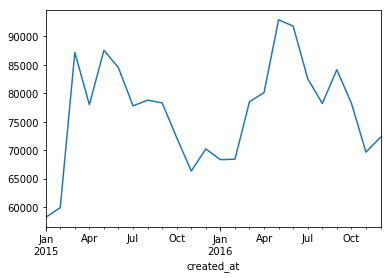

In [21]:
df['Complaint Type'].resample('M').count().plot()

# Hmmm, it looks like a cycle

What could cause that? Try a couple comparisons to see if you can find out.

- Tip: Maybe the most popular summer complaints vs winter
- Tip: Maybe graphing the different agencies on the same graph

If you don't figure it out **that's okay!** 

In [22]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [23]:
df[df.index.month.isin([1,2,3])].head()

Created Date             Closed Date Agency  \
created_at                                                                   
2016-03-02 03:09:00  03/02/2016 03:09:00 PM                     NaN    DOT   
2016-01-03 10:18:01  01/03/2016 10:18:01 PM  01/20/2016 01:51:09 PM    DOT   
2016-01-02 09:47:00  01/02/2016 09:47:00 AM  01/02/2016 10:55:00 AM    DOT   
2016-01-04 04:23:00  01/04/2016 04:23:00 PM  01/04/2016 05:35:00 PM    DOT   
2016-01-01 02:40:00  01/01/2016 02:40:00 PM  01/01/2016 03:10:00 PM    DOT   

                               Complaint Type  \
created_at                                      
2016-03-02 03:09:00    Street Light Condition   
2016-01-03 10:18:01    DOT Literature Request   
2016-01-02 09:47:00  Traffic Signal Condition   
2016-01-04 04:23:00  Traffic Signal Condition   
2016-01-01 02:40:00  Traffic Signal Condition   

                                                         Descriptor  \
created_at                                                            
2016-03-02 03:09:00                                Street Light Out   
2016-01-03 10:18:01  2016 Alternate Side Parking Calendar - English   
2016-01-02 09:47:00                                      Controller   
2016-01-04 04:23:00                                      Controller   
2016-01-01 02:40:00                                Reflector/Louvre   

                              closed_at  
created_at                               
2016-03-02 03:09:00                 NaT  
2016-01-03 10:18:01 2016-01-20 01:51:09  
2016-01-02 09:47:00 2016-01-02 10:55:00  
2016-01-04 04:23:00 2016-01-04 05:35:00  
2016-01-01 02:40:00 2016-01-01 03:10:00

In [24]:
df[df.index.month.isin([6,7,8])].head()


Created Date             Closed Date Agency  \
created_at                                                                   
2016-08-02 11:45:44  08/02/2016 11:45:44 PM  04/29/2017 04:30:00 PM    DOT   
2015-06-20 09:27:31  06/20/2015 09:27:31 AM                     NaN    DOT   
2015-06-20 01:59:31  06/20/2015 01:59:31 PM                     NaN    DOT   
2015-06-21 03:24:00  06/21/2015 03:24:00 PM                     NaN    DOT   
2015-06-20 06:11:25  06/20/2015 06:11:25 PM                     NaN    DOT   

                       Complaint Type Descriptor           closed_at  
created_at                                                            
2016-08-02 11:45:44  Street Condition    Pothole 2017-04-29 04:30:00  
2015-06-20 09:27:31  Street Condition    Pothole                 NaT  
2015-06-20 01:59:31  Street Condition    Pothole                 NaT  
2015-06-21 03:24:00  Street Condition    Pothole                 NaT  
2015-06-20 06:11:25  Street Condition    Pothole                 NaT

## Time of day

### What time of day do people complain?

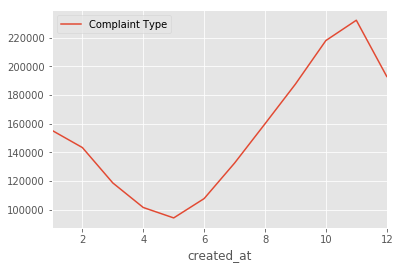

In [25]:
df.groupby(df.index.hour).count().plot(y='Complaint Type')

### What time of day do people complain about potholes?

In [26]:
df['Descriptor'].value_counts()

Loud Music/Party                                             432588
No Access                                                    163622
Street Light Out                                             147587
Pothole                                                      138134
Banging/Pounding                                             122237
Loud Talking                                                  78513
Posted Parking Sign Violation                                 62033
Partial Access                                                56305
Blocked Hydrant                                               50785
With License Plate                                            50758
Controller                                                    41109
Blocked Sidewalk                                              32649
Commercial Overnight Parking                                  31242
Car/Truck Music                                               26665
Cave-in                                         

In [27]:
df[df['Descriptor'] == 'Pothole'].count()

Created Date      138134
Closed Date       137071
Agency            138134
Complaint Type    138134
Descriptor        138134
closed_at         137071
dtype: int64

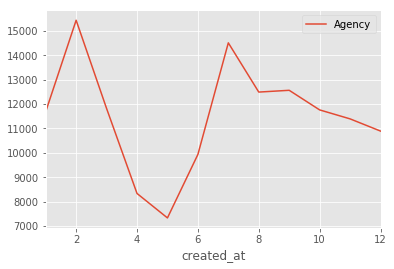

In [28]:
# df['Descriptor'].groupby(by=df.index.hour).value_counts().plot()


df[df['Descriptor'] == 'Pothole'].groupby(by=df[df['Descriptor'] == 'Pothole'].index.hour).count().plot(y='Agency')

# df[df['Descriptor'] == 'Pothole'].groupby(by=df.index.hour).count().plot()

### What time of day do people complain about loud parties?

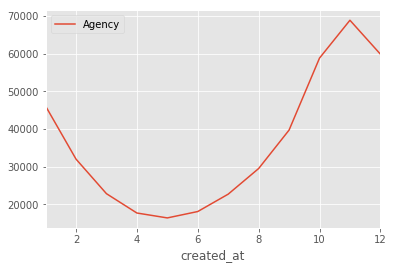

In [29]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.hour).count().plot(y='Agency')

## Days of the week

### What days of the week do people complain about potholes?

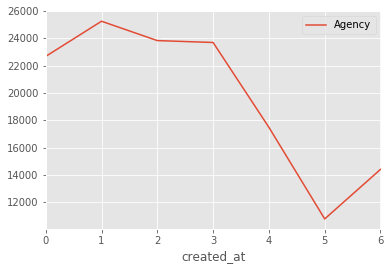

In [30]:
df[df['Descriptor'] == 'Pothole'].groupby(by=df[df['Descriptor'] == 'Pothole'].index.dayofweek).count().plot(y='Agency')


### What days of the week do people complain about loud parties?

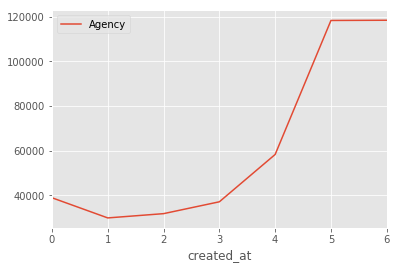

In [31]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.dayofweek).count().plot(y='Agency')

### What do you think is the best kind of graph for describing day of the week complaints?

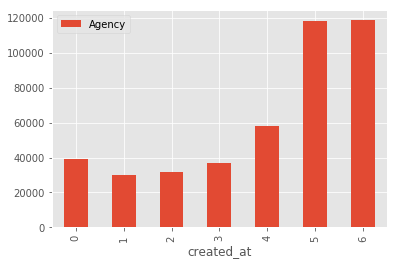

In [32]:
df[df['Descriptor'] == 'Loud Music/Party'].groupby(by=df[df['Descriptor'] == 'Loud Music/Party'].index.dayofweek).count().plot(kind='bar', y='Agency')

# Some more investigation

## Are there more homeless people in the city in the summer or in the winter?

In [33]:
df[df.index.month.isin([1,2,3])].head()

Created Date             Closed Date Agency  \
created_at                                                                   
2016-03-02 03:09:00  03/02/2016 03:09:00 PM                     NaN    DOT   
2016-01-03 10:18:01  01/03/2016 10:18:01 PM  01/20/2016 01:51:09 PM    DOT   
2016-01-02 09:47:00  01/02/2016 09:47:00 AM  01/02/2016 10:55:00 AM    DOT   
2016-01-04 04:23:00  01/04/2016 04:23:00 PM  01/04/2016 05:35:00 PM    DOT   
2016-01-01 02:40:00  01/01/2016 02:40:00 PM  01/01/2016 03:10:00 PM    DOT   

                               Complaint Type  \
created_at                                      
2016-03-02 03:09:00    Street Light Condition   
2016-01-03 10:18:01    DOT Literature Request   
2016-01-02 09:47:00  Traffic Signal Condition   
2016-01-04 04:23:00  Traffic Signal Condition   
2016-01-01 02:40:00  Traffic Signal Condition   

                                                         Descriptor  \
created_at                                                            
2016-03-02 03:09:00                                Street Light Out   
2016-01-03 10:18:01  2016 Alternate Side Parking Calendar - English   
2016-01-02 09:47:00                                      Controller   
2016-01-04 04:23:00                                      Controller   
2016-01-01 02:40:00                                Reflector/Louvre   

                              closed_at  
created_at                               
2016-03-02 03:09:00                 NaT  
2016-01-03 10:18:01 2016-01-20 01:51:09  
2016-01-02 09:47:00 2016-01-02 10:55:00  
2016-01-04 04:23:00 2016-01-04 05:35:00  
2016-01-01 02:40:00 2016-01-01 03:10:00

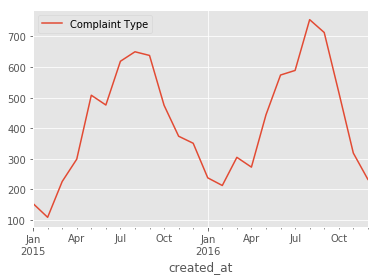

In [34]:
df[df['Complaint Type'] == 'Homeless Encampment'].sort_index().resample('M').count().plot(y='Complaint Type')

## What holiday(s) are most popular for illegal fireworks?

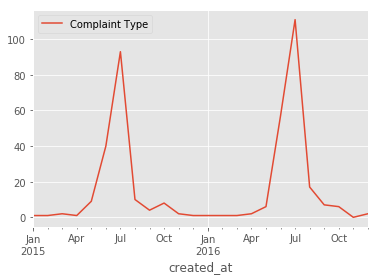

In [35]:
df[df['Complaint Type'] == 'Illegal Fireworks'].sort_index().resample('M').count().plot(y='Complaint Type')

## Plot all kinds of noise complaints on top of each other

In [36]:
# Noise - Street/Sidewalk
# Noise - Residential            
# Noise - Commercial              
# Noise - Vehicle                 
# Noise - Park                     
# Noise - House of Worship         


In [39]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

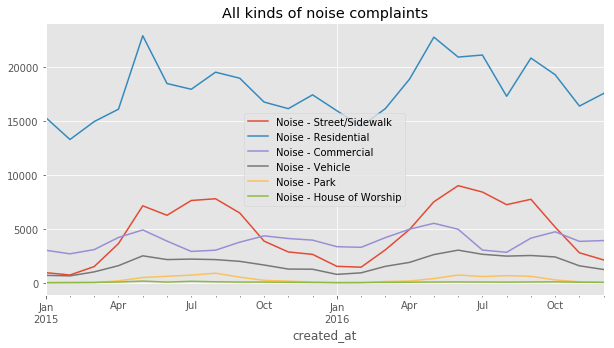

In [56]:
fig, ax = plt.subplots(figsize = (10,5))

ax.set_title('All kinds of noise complaints')

df[df['Complaint Type'] == 'Noise - Street/Sidewalk'].sort_index().resample('M').count().plot(label = 'Noise - Street/Sidewalk', y = 'Complaint Type', ax=ax)
df[df['Complaint Type'] == 'Noise - Residential'].sort_index().resample('M').count().plot(label = 'Noise - Residential', y = 'Complaint Type', ax=ax)
df[df['Complaint Type'] == 'Noise - Commercial'].sort_index().resample('M').count().plot(label = 'Noise - Commercial', y = 'Complaint Type', ax=ax)
df[df['Complaint Type'] == 'Noise - Vehicle'].sort_index().resample('M').count().plot(label = 'Noise - Vehicle', y = 'Complaint Type', ax=ax)
df[df['Complaint Type'] == 'Noise - Park'].sort_index().resample('M').count().plot(label = 'Noise - Park', y = 'Complaint Type',ax=ax)
df[df['Complaint Type'] == 'Noise - House of Worship'].sort_index().resample('M').count().plot(label = 'Noise - House of Worship', y = 'Complaint Type', ax=ax)
